In [1]:
#####################################################
# Alice's Adventures in Wonderland by Lewis Carroll #
#####################################################

# Retrieve a copy of the text from the url

import urllib.request

text_file = urllib.request.urlopen('https://www.gutenberg.org/cache/epub/11/pg11.txt')
print(f'web: {text_file}')

##############################################################################################
# Read and decode the text
raw_text = text_file.read().decode('utf-8')
print(f'characters (RAW TEXT): {len(raw_text)}\nText: \n')
print('*'*80)
print(raw_text[:2000]) # I print the first 2000 chars')
##############################################################################################

# I search and find (by hand) the REAL beginning of the text

print(raw_text[1550:3000]) # --> from 1550 char number

##############################################################################################
###### CLEANING UP THE BEGINNING ###### 

# so now I delete the first 1550 chars

text = raw_text[1550:]

print('.\n.\n.\n' + '-'*100 + '\n')
print(f'currently chars (final text): {len(text)}\nText: \n')
print('*'*80)
print(text[:300]) # I print the first chars

##############################################################################################


web: <http.client.HTTPResponse object at 0x7f896fbbe0e0>
characters (RAW TEXT): 167899
Text: 

********************************************************************************
﻿
    The Project Gutenberg eBook of Alice's Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and 
most other parts of the world at no cost and with almost no restrictions 
whatsoever. You may copy it, give it away or re-use it under the terms 
of the Project Gutenberg License included with this ebook or online 
at www.gutenberg.org. If you are not located in the United States, 
you will have to check the laws of the country where you are located 
before using this eBook.



    
        Title: Alice's Adventures in Wonderland
        
        Author: Lewis Carroll

        
        Release date: June 27, 2008 [eBook #11]Most recently updated: March 30, 2021
        Language: English
        
        Credits: Arthur DiBianca and David Widger
    
        
           

In [2]:
#tokenize text by words

import nltk

from nltk import word_tokenize

nltk.download('punkt')

words = word_tokenize(text)

print(f'total words: {len(words)}\n {words[:10]}')

[nltk_data] Downloading package punkt to /Users/fede11/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


total words: 37786
 ['CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to']


In [54]:
### create a list with the frequency of words ###

from nltk.probability import FreqDist

frec = FreqDist(words)

print(frec.most_common(20)) # show the 20 most common words


[(',', 2565), ('the', 1681), ('“', 1129), ('”', 1125), ('.', 900), ('and', 837), ('to', 793), ('’', 708), ('a', 668), ('of', 602), ('it', 523), ('I', 511), ('she', 507), ('said', 453), ('!', 452), ('in', 408), ('Alice', 396), ('you', 391), ('was', 352), ('that', 280)]


In [55]:
# I create an empty list to store words #
words_cleaned = []
for word in words:
    if word.isalpha():
        words_cleaned.append(word.lower())

print(f'The total number of words without punctuation: {len(words_cleaned)}')

frec = FreqDist(words_cleaned)
print(frec.most_common(10))

The total number of words without punctuation: 29040
[('the', 1807), ('and', 906), ('to', 800), ('a', 683), ('of', 624), ('it', 588), ('she', 546), ('i', 511), ('you', 459), ('said', 457)]


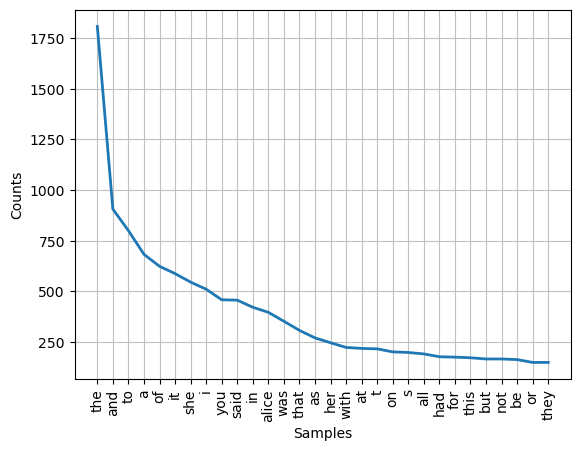

In [56]:
### PLOT ###

from matplotlib import pyplot as plt

frec.plot(30) # plot the 30 most common words

plt.show()

In [6]:
### Deleting "Stopwords"

nltk.download("stopwords") # Download a list of stopwords
from nltk.corpus import stopwords # and import

#list of stopwords
stopwords_list = stopwords.words("english")

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fede11/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
# deleting the stopwords

words_without_stops = []

for word in words_cleaned:
    if word not in stopwords_list:
        words_without_stops.append(word)

print(f'Total number of words without punctuation and stopwords: {len(words_without_stops)}')

frec_cleaned = FreqDist(words_without_stops)
print(frec_cleaned.most_common(20))

Total number of words without punctuation and stopwords: 11970
[('alice', 397), ('little', 126), ('project', 85), ('queen', 75), ('thought', 74), ('know', 73), ('see', 68), ('time', 67), ('king', 63), ('well', 58), ('mock', 56), ('turtle', 56), ('hatter', 55), ('gryphon', 55), ('way', 53), ('quite', 53), ('work', 53), ('much', 52), ('go', 50), ('thing', 49)]


In [59]:
# adding some stopwords to the list

stopwords_list.extend(["chapter","must", "first", "would", "said", "one", "like", "came", "back", "went", "could", "began"])

words_without_stops_2 = []
for word in words_cleaned:
    if word not in stopwords_list:
        words_without_stops_2.append(word)
        
frec_cleaned_2 = FreqDist(words_without_stops_2)
print(frec_cleaned_2.most_common(30))
print(f'\nwords: {len(frec_cleaned_2)}')

[('alice', 397), ('little', 126), ('project', 85), ('queen', 75), ('thought', 74), ('know', 73), ('see', 68), ('time', 67), ('king', 63), ('well', 58), ('mock', 56), ('turtle', 56), ('hatter', 55), ('gryphon', 55), ('way', 53), ('quite', 53), ('work', 53), ('much', 52), ('go', 50), ('thing', 49), ('say', 48), ('head', 48), ('rabbit', 47), ('voice', 47), ('get', 46), ('come', 46), ('think', 45), ('looked', 45), ('got', 45), ('never', 44)]

words: 2699


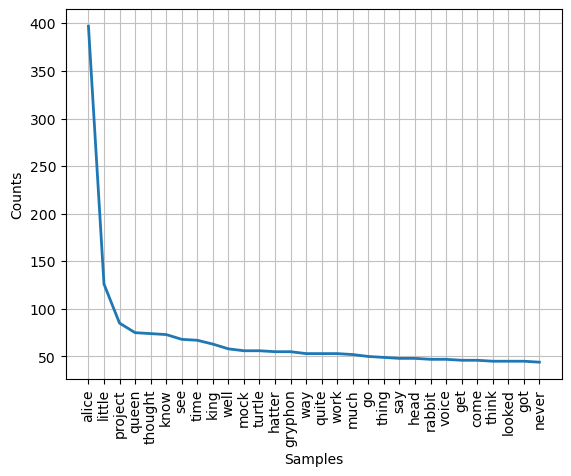

In [60]:
### PLOT ###

frec_cleaned_2.plot(30) # plot the 30 most common words

plt.show()

### Building the word cloud

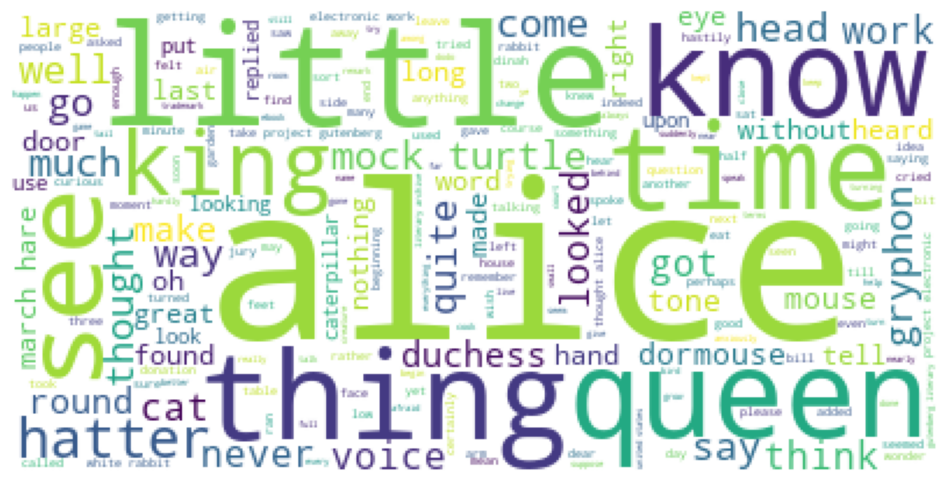

In [61]:
from wordcloud import WordCloud

clean_words_string = " ".join(words_without_stops_2) # converts the words list to a single string

wordcloud = WordCloud(background_color="white").generate(clean_words_string) # generating the wordcloud

# Plotting the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# to remove the axis value
plt.axis("off")
plt.show()


# -------------------------------- plot -------------------------------- 

In [68]:
print(frec_cleaned_2.N()) # total words (samples) in the text
print(frec_cleaned_2.B()) # words counted (withour repetition)

# create dict with the "first" x items

x = 20
first_x_pairs = {k:frec_cleaned_2[k] for k in list(frec_cleaned_2)[:x]}

word = list(first_x_pairs.keys())
frequency = list(first_x_pairs.values())


# create DataFrame for plotting
import pandas as pd
d = {'word': word, 'frequency': frequency}
df = pd.DataFrame(data=d)
print(df)

11970
2699
       word  frequency
0     alice        397
1    little        126
2   project         85
3     queen         75
4   thought         74
5      know         73
6       see         68
7      time         67
8      king         63
9      well         58
10     mock         56
11   turtle         56
12   hatter         55
13  gryphon         55
14      way         53
15    quite         53
16     work         53
17     much         52
18       go         50
19    thing         49


<Axes: xlabel='frequency', ylabel='word'>

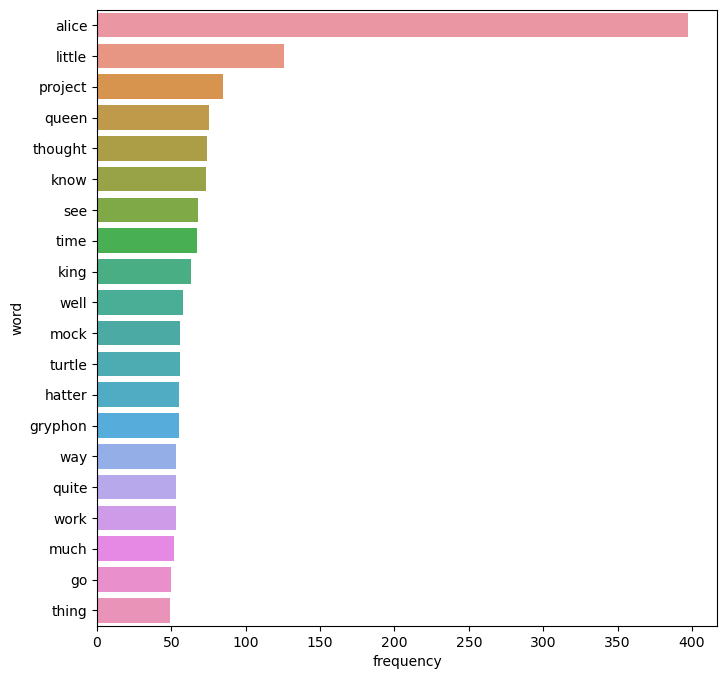

In [69]:
import seaborn as sns

fig, axes = plt.subplots(figsize=(8,8))

sns.barplot(y='word', x='frequency', data=df, orient='h')
